## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

3. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

4. The assignment is worth 100 points, and is due on **20th October 2024 at 11:59 pm**. 

5. **Five points are properly formatting the assignment**. The breakdown is as follows:
- Must be an HTML file rendered using Quarto (2 pts).
- There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) (1 pt)
- Final answers of each question are written in Markdown cells (1 pt).
- There is no piece of unnecessary / redundant code, and no unnecessary / redundant text (1 pt)

## Air quality sensors 
**(An application of broadcasting NumPy arrays)**

Air quality sensors are used to measure the amount of contaminants in air. This question will guide you in finding the location of installing 50 air quality sensors in the State of Colorado, such that they are as far away from each other as possible. The approach below is a greedy algorithm to find an approximate [Maximin design](https://www.sciencedirect.com/science/article/abs/pii/037837589090122B).

The file *colorado_coordinate_grid.txt* contains the coordinate-pairs (latitude and longitude) of potential locations for installing  an air quality sensor. 

### Data

Read the file with NumPy. How many coordinate-pairs are there in the file?

Note that:

1. A coordinate-pair means a latitude-longitude pair.

2. 'Air quality sensor' will be referred as 'sensor' in the questions below for brevity.

*(4 points)*

In [1]:
import pandas as pd
import numpy as np

coordinate_data = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-1/Data/colorado_coordinate_grid.txt")
all_coordinates = np.array(coordinate_data)  
print(len(all_coordinates))

10000


### First sensor
The first sensor is to be installed closest to Denver *(closest in terms of Euclidean distance)*. Find the coordinate-pair of the location where the first sensor will be installed. The coordinate-pair of Denver is: [39.7392$^{\circ}$ N, 104.9903$^{\circ}$ W] 

Note that the suffixes $^{\circ}$ N and $^{\circ}$ W are omitted in the file *colorado_coordinate_grid.txt*.

**Hint:** Broadcasting

*(4 points)*

In [2]:
denver = np.array([39.7392, -104.9903])
distance_from_denver = np.sqrt((denver[0] - all_coordinates[:,0])**2 + (denver[1] - all_coordinates[:,1])**2)
print(all_coordinates[np.argmin(distance_from_denver)])

[ 39.74747475 102.        ]


### Second sensor
Find the coordinate-pair of the installation of the next sensor, such that it is as far as possible from the first sensor installed near Denver.

**Hint:** Broadcasting

*(4 points)*

In [3]:
first_coord = all_coordinates[np.argmin(distance_from_denver)]
second_distances = np.sqrt(np.sum((all_coordinates - first_coord)**2, axis=1))
second_coord_idx = np.argmax(second_distances)
second_coord = all_coordinates[second_coord_idx]
print(second_coord)

[ 37. 109.]


### First two sensors 
Stack the coordinate-pairs of the first and second sensors vertically to obtain a 2 x 2 NumPy array. Name the array as `air_sensor_coordinates`. 

Run the code below to check if your results seem correct. The coordinate-pairs of the two air quality sensors will be marked as blue dots.

*(4 points)*

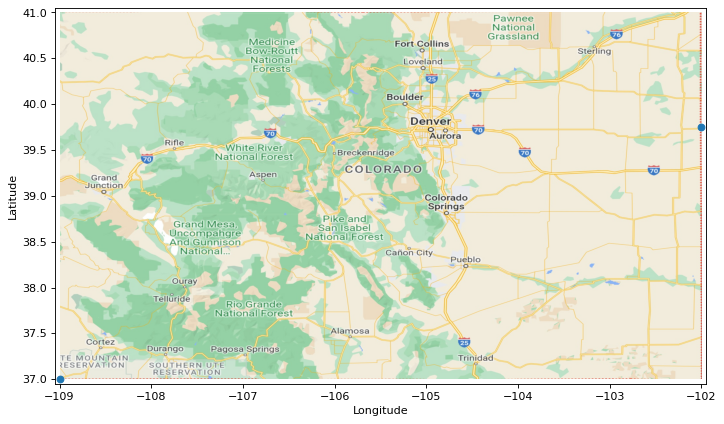

In [4]:
import matplotlib.pyplot as plt

air_sensor_coordinates = np.array([first_coord, second_coord])
def sensor_viz():
    img = plt.imread("/Users/vaibhavrangan/Downloads/Stat_303-1/.venv/Images/colorado.jpg")
    fig, ax = plt.subplots(figsize=(10, 100),dpi=80)
    fig.set_size_inches(10.5, 15)
    ax.imshow(img,extent=[-109, -102, 37, 41])
    plt.scatter(y = air_sensor_coordinates[:,0], x = -air_sensor_coordinates[:,1])
    plt.xlim(-109.05,-101.95)
    plt.ylim(36.95,41.05)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
sensor_viz()

### Third sensor

Now you need to find the coordinate-pair for installing the third sensor such that it is far away from the two already-installed sensors. Proceed as follows:

1. Find the minimum distance of each coordinate-pair in *colorado_coordinate_grid.txt* from the two already installed sensors. For example, if a coordinate-pair is at a distance of 5 units from the first sensor, and 10 units from the second sensor, then its minimum distance from the sensors will be $\min(5,10) = 5$ units. 


2. Select the coordinate-pair (from *colorado_coordinate_grid.txt*) whose minimum distance from the two already installed sensors is the maximum. 


3. Stack the coordinate-pair of the third air quality sensor vertically on the array `air_sensor_coordinates`. 

Call the function `sensor_viz()` to check if your results seem correct. The coordinate-pairs of the three air quality sensors will be marked as blue dots.

**Hint:**

For step (1) above:

1. Define a function which computes the distances of a coordinate-pair from all the coordinates of `air_sensor_coordinates`, and returns the minimum distance.

2. Apply the function on all the coordinate-pairs in *colorado_coordinate_grid.txt* using the NumPy function `apply_along_axis()`.

*(20 points)*

[ 41.        106.5252525]
[[ 39.74747475 102.        ]
 [ 37.         109.        ]
 [ 41.         106.5252525 ]]


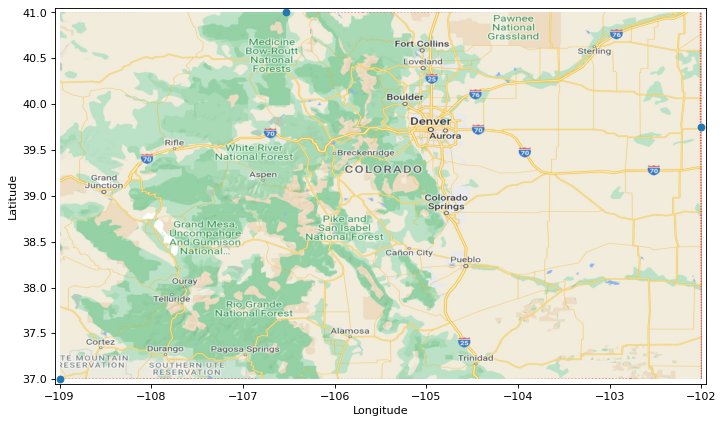

In [5]:
def min_distance(coord):
    return np.min(np.sqrt(np.sum((air_sensor_coordinates - coord)**2, axis=1)))

sensor_three = all_coordinates[np.argmax(np.apply_along_axis(min_distance, 1, all_coordinates))]
air_sensor_coordinates = np.vstack([air_sensor_coordinates, sensor_three])

print(sensor_three)
print(air_sensor_coordinates)
sensor_viz()

### All 50 sensors

You need to find 47 more coordinate-pairs to install air quality sensors well-spread across Colorado. We will generalize the steps in the previous question to proceed as follows:

1. Suppose you have already found the coordinate-pairs for the installation of *i* sensors.


2. Find the minimum distance of each coordinate in *colorado_coordinate_grid.txt* from the *i* already installed sensors. For example, if a coordinate-pair is at a distance of $d_1$ from the first sensor, $d_2$ from the second sensor,..., and $d_i$ from the $i^{th}$ sensor, then its minimum distance from the sensors will be $min(d_1, d_2, ..., d_i$). 


3. Select the $i+1^{th}$ coordinate-pair (from *colorado_coordinate_grid.txt*) as the one whose minimum distance from the $i$ already installed sensors is the maximum. 

Call the function `sensor_viz()` to check if your results seem correct. You should see 50 blue dots well spread across Colorado.

*(10 points)*

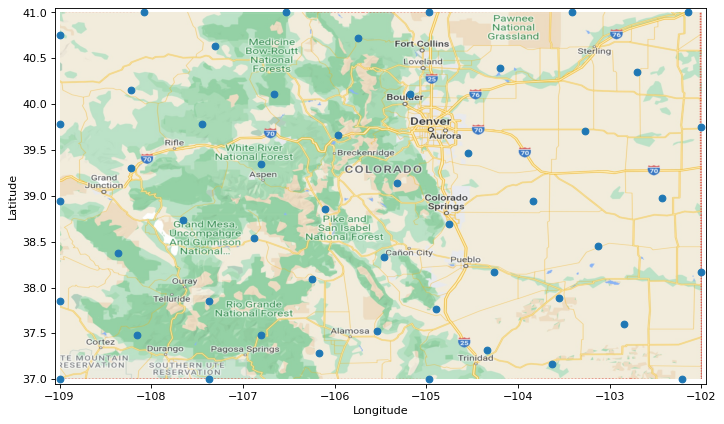

In [6]:
for _ in range(47):
    next_sensor = all_coordinates[np.argmax(np.apply_along_axis(min_distance, 1, all_coordinates))]
    air_sensor_coordinates = np.vstack([air_sensor_coordinates, next_sensor])

sensor_viz()

## Sales
**(An application of matrix multiplication with NumPy arrays)**

When the monthly sales of a product are subject to seasonal fluctuations, a curve that approximates the sales formula might have the form:

$$y = a + b*x + c*\sin\bigg(2*\pi*\frac{x}{12}\bigg),$$

where $x$ is the time since the starting point in months and $y$ is the monthly sales in USD (million). The term $a + b*x$ gives the basic sales trend and the $\sin$ term reflects the seasonal changes in sales. Suppose the model parameters (i.e., $a$, $b$, and $c$) are estimated and put on the list below for the sales of a certain brand of sunscreen starting June 1, 2017.

In [7]:
model_parameters = [2, 5, 18]
# a = 2, b = 5, c = 18

Then, the total monthly sales in June 2017 will be calculated by plugging 1 as $x$ into the equation.

Using matrix multiplication with NumPy, we wish to estimate the total sales between June 1 2017 and March 1, 2020. *(So many models failed to predict sales after that - probably due to covid.)*

Proceed as follows.

### Create first array
Create a numpy array where the first column is all $1$s, the second column is a range of numbers from 1 to the total number of months from June 1 2017 to March 1 2020 and the third column is $\sin(2*\pi*x/12)$ values with $x$ values as plugged-in in the second column.

*(10 points)*

In [8]:
import numpy as np

number_of_months = 33
first_col = np.ones(number_of_months)
second_col = np.arange(1, number_of_months + 1)
third_col = np.sin(2 * np.pi * second_col / 12)
result = np.column_stack((first_col, second_col, third_col))

print(result)


[[ 1.00000000e+00  1.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  2.00000000e+00  8.66025404e-01]
 [ 1.00000000e+00  3.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  4.00000000e+00  8.66025404e-01]
 [ 1.00000000e+00  5.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  6.00000000e+00  1.22464680e-16]
 [ 1.00000000e+00  7.00000000e+00 -5.00000000e-01]
 [ 1.00000000e+00  8.00000000e+00 -8.66025404e-01]
 [ 1.00000000e+00  9.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+01 -8.66025404e-01]
 [ 1.00000000e+00  1.10000000e+01 -5.00000000e-01]
 [ 1.00000000e+00  1.20000000e+01 -2.44929360e-16]
 [ 1.00000000e+00  1.30000000e+01  5.00000000e-01]
 [ 1.00000000e+00  1.40000000e+01  8.66025404e-01]
 [ 1.00000000e+00  1.50000000e+01  1.00000000e+00]
 [ 1.00000000e+00  1.60000000e+01  8.66025404e-01]
 [ 1.00000000e+00  1.70000000e+01  5.00000000e-01]
 [ 1.00000000e+00  1.80000000e+01  3.67394040e-16]
 [ 1.00000000e+00  1.90000000e+01 -5.00000000e-01]
 [ 1.00000000e+00  2.00000000e+

### Create second array 
Create an array from the list `model_parameters`.

*(3 points)*

In [9]:
model_parameters_array = np.array(model_parameters)
print(model_parameters_array)

[ 2  5 18]


### Multiply arrays
Use matrix multiplication to get the monthly sales estimates for each month in the range: June 1 2017 and March 1, 2020.

*(8 points)*

In [10]:
model_parameters_array = model_parameters_array.reshape(-1, 1)
monthly_sales = np.matmul(result, model_parameters_array)
print(monthly_sales)

[[ 16.        ]
 [ 27.58845727]
 [ 35.        ]
 [ 37.58845727]
 [ 36.        ]
 [ 32.        ]
 [ 28.        ]
 [ 26.41154273]
 [ 29.        ]
 [ 36.41154273]
 [ 48.        ]
 [ 62.        ]
 [ 76.        ]
 [ 87.58845727]
 [ 95.        ]
 [ 97.58845727]
 [ 96.        ]
 [ 92.        ]
 [ 88.        ]
 [ 86.41154273]
 [ 89.        ]
 [ 96.41154273]
 [108.        ]
 [122.        ]
 [136.        ]
 [147.58845727]
 [155.        ]
 [157.58845727]
 [156.        ]
 [152.        ]
 [148.        ]
 [146.41154273]
 [149.        ]]


### Sum array elements 
Find the total sales between June 1 2017 and March 1, 2020.

*(3 points)*

In [11]:
print(monthly_sales.sum())

2895.58845726812


## Exercise minutes
**(An application of parallel computation with NumPy)**

This problem demonstrates the benefit of generating pseudo random number matrix with NumPy.

The list `exercise_minutes` below consists of exercise minutes per week of the students of STAT303-1 Fall 2022 class.

We wish to find the **95% confidence interval** of mean `exercise_minutes`, using [Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)).  

Bootstrapping is a non-parametric method for obtaining confidence interval. The method is as follows.  

(a) Suppose the list `exercise_minutes` has $N$ values.

(b) Randomly sample $N$ values with replacement from `exercise_minutes`

(c) Find the mean of the $N$ values obtained in (b) 

(d) Repeat steps (b) and (c) 10,000 times 

(e) The 95% Confidence interval is the range between the 2.5% and 97.5% percentile values of the 10,000 means obtained in (c)

In [12]:
exercise_minutes=[240, 180, 60, 300, 0, 360, 60, 140, 60, 0, 150, 60, 0, 6, 60, 300, 90, 100, 250, 240, 300, 630, 420, 50, 0, 60, 240, 300, 180, 420, 90, 8, 180, 15, 8, 150, 180, 240, 60, 1200, 210, 360, 720, 240, 360, 240, 250, 180, 600, 120, 60, 200, 360, 120, 20, 250, 60, 420, 420, 150, 350, 180, 14, 60, 450, 180, 300, 1, 180, 7, 180, 300, 70, 40, 300, 60, 180, 225, 90, 300, 240, 200, 60, 200, 360, 3, 200, 300, 90, 60, 180, 120, 10, 0, 200, 700, 300, 300, 5, 60, 420, 300, 240, 200, 180, 180, 120, 300, 375, 60, 240, 180, 180, 90, 240, 180, 15, 300, 60, 120, 120, 240, 400, 200, 60, 480, 120, 300, 180, 250, 280, 7, 600, 240, 0, 420, 60, 2, 280, 300, 60, 0, 250, 180, 540, 30, 210, 2, 90, 120, 180, 240, 540, 400, 120, 150, 360, 180, 200, 180, 30, 60, 300, 80, 60, 210, 315, 360, 275, 200, 150, 180, 200, 150, 0, 1200, 240, 120, 300, 360, 180, 240, 630, 250, 240, 5, 30, 0, 300, 60, 90]

Answer the following questions.

### Sequential computation without NumPy 
Without using NumPy, compute the:

1. Confidence interval of mean `exercise_minutes`, and 

2. Time taken to execute the code

**Hints:** 

1. You may use the library `random`.

2. You may use the library `time` for computing the time taken to execute the code.

*(12 points)*

In [13]:
import random as rand
import time 

start = time.time()

sample_means = []

for i in range(10000):
    sample = rand.choices(exercise_minutes, k = len(exercise_minutes))
    sample_means.append(sum(sample) / len(sample))

sample_means = sorted(sample_means)
lower_bound_idx = int(0.025 * (len(sample_means) - 1))
upper_bound_idx = int(0.975 * (len(sample_means) - 1))
print(sample_means[lower_bound_idx], sample_means[upper_bound_idx])

end = time.time()
non_numpy_time = end - start
print(non_numpy_time)


180.52879581151834 230.87434554973822
0.3388028144836426


### Parallel computation with NumPy
Using NumPy, and without using loops, compute the:

1. Confidence interval of mean `exercise_minutes`, and 
2. Time taken to execute the code

*(12 points)*

In [14]:
import time

start = time.time()

bootstrap_samples=np.random.choice(exercise_minutes,size = (10000,len(exercise_minutes)))
bootstrap_sample_means = bootstrap_samples.mean(axis=1)

# print 95% confidence interval
print(np.percentile(bootstrap_sample_means, 2.5), np.percentile(bootstrap_sample_means, 97.5))

end = time.time()
numpy_time = end - start
print(numpy_time)

180.58507853403142 231.67054973821988
0.03264784812927246


### Time saving with NumPy
Report the ratio of time taken to execute the code wihout NumPy to the time taken to execute the code with NumPy.

*(1 point)*

In [15]:
print(non_numpy_time / numpy_time)

10.377492971117684
